In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import Ridge, Lasso
import seaborn as sns
import scipy.io as spio

## Regressão com uma variável

In [244]:
data = pd.read_csv('../T1/data/ex1data1.txt', header=None)

In [245]:
data.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [246]:
X = np.array(data.iloc[:, :-1])
y = np.array(data.iloc[:, 1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=31)

### $k$-NN

O algoritmo $k$-NN pode ser utilizado tanto para problemas de regressão quanto para problemas de classificação. Nesta seção do trabalho o algoritmo $k$-NN será utilizado para resolver um problema de regressão. Para a sintonização do hiperparâmetro $k$ será feita a busca randomizada utilizando a classe _RandomizedSearchCV_ da biblioteca _Scikit Learn_, a busca randomizada consiste na escolha aleatória dentre os valores de entrada para os hiperparâmetros para encontrar o melhor valor. A entrada do hiperparâmetro $k$ para a busca randomizada consiste de uma lista de números de 1 a 30, são realizadas 20 iterações escolhendo um valor aleatório da lista de valores para $k$ (parâmetro _n\_iter_) e validação cruzada com 5 _folds_ (parâmetro _cv_). Os resultados são apresentados seguir.

In [247]:
params = {'n_neighbors': list(range(1, 31))}
knn = KNeighborsRegressor(weights = 'distance')

search = RandomizedSearchCV(knn, params, n_iter=20, cv=5, scoring='neg_mean_squared_error')
search.fit(X_train, y_train)

k = search.best_params_['n_neighbors']
best_score = np.sqrt(-search.best_score_)

print(f'RMSE melhor modelo: {best_score}')
print(f'Usando k = {k}')

model = search.best_estimator_
y_pred = model.predict(X_test)
model_score = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Score do modelo: {model_score}')

RMSE melhor modelo: 2.803480846064765
Usando k = 6
Score do modelo: 4.573235950443419


### Árvore de decisão

Assim como o $k$-NN, as árvores de decisão podem ser utilizadas para problemas de classificação e de regressão. Nesta seção do trabalho será utilizada a árvore de decisão para resolver um problema de regressão. A sintonização dos hiperparâmetros será feita mesma maneira do algoritmo anterior utilizando a busca randomizada com a classe _RandomizedSearchCV_ da biblioca _Scikit Learn_. As entradas para a sintonização dos hiperparâmetros serão a altura da árvore, consistindo de uma lista de números de 2 a 30, e os critérios de qualidade da divisão _mse_, _friedman\_mse ou _mae_. Assim como na sintonização de hiperparâmetros feita anteriormente são realizadas 20 iterações e validação cruzada com 5 _folds_. Os resultados são apresentados a seguir.

In [248]:
params = {'max_depth': [None] + list(range(2, 31)), 'criterion': ['mse', 'friedman_mse', 'mae']}
dt = DecisionTreeRegressor()

search = RandomizedSearchCV(dt, params, n_iter=20, cv=5, scoring='neg_root_mean_squared_error')
search.fit(X_train, y_train)

max_depth = search.best_params_['max_depth']
criterion = search.best_params_['criterion']
#best_score = np.sqrt(-search.best_score_)
best_score = -search.best_score_

print(f'RMSE melhor modelo: {best_score}')
print(f'Altura da árvore: {max_depth}')
print(f'Critério de qualidade da divisão: {criterion}')

model = search.best_estimator_
y_pred = model.predict(X_test)
#model_score = np.sqrt(mean_squared_error(y_test, y_pred))
model_score = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Score do modelo: {model_score}')

RMSE melhor modelo: 2.6473731356360473
Altura da árvore: 2
Critério de qualidade da divisão: mse
Score do modelo: 3.982467715922925


## Regressão com múltiplas variáveis

In [249]:
data = pd.read_csv('../T1/data/ex1data2.txt', header=None)

In [250]:
data.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [251]:
X = np.array(data.iloc[:, :-1])
y = np.array(data.iloc[:, 1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=31)

Na seção anterior foram utilizados o algoritmo $k$-NN e a árvore de decisão para resolver um problema de regressão com uma variável, nesta seção serão utilizadas as mesmas abordagens para resolver um problema de regressão com duas variáveis.

Antes de aplicar as técnicas de regressão os dados deste dataset devem ser normalizados, para isto, será utilizada a classe _StandardScaler_ da biblioteca _Scikit Learn_ para normalizar os dados, esta classe aplica a fórmula do $z$-score para normalizar os dados.

Para a sintonização dos hiperparâmetros será feita a busca aleatória assim como a seção anterior. Como entrada para a sintonização de hiperparâmetros para os valores de $k$ é utilizada uma lista de número de 1 a 20, com 20 iterações e validação cruzada com 10 _folds_. A seguir serão apresentados os resultados.

In [252]:
ss = StandardScaler()
X_train_norm = ss.fit_transform(X_train)

params = {'n_neighbors': list(range(1, 21))}
knn = KNeighborsRegressor(weights = 'distance')

search = RandomizedSearchCV(knn, params, n_iter=20, cv=10, scoring='neg_mean_squared_error')
search.fit(X_train_norm, y_train)

k = search.best_params_['n_neighbors']
best_score = np.sqrt(-search.best_score_)

print(f'RMSE melhor modelo: {best_score}')
print(f'Usando k = {k}')

model = search.best_estimator_
X_test_norm = ss.fit_transform(X_test)
y_pred = model.predict(X_test)
model_score = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Score do modelo: {model_score}')

RMSE melhor modelo: 0.22238822449555887
Usando k = 4
Score do modelo: 0.7719415567373592


Para a árvore de decisão a entrada para a sintonização dos hiperparâmetros são a altura da árvore, sendo uma lista de 2 a 30, e os critérios de qualidade da divisão mse, friedman_mse ou _mae_. São feitas também 20 iterações e validação cruzada com 10 _folds_. A seguir serão apresentados os resultados.

In [253]:
params = {'max_depth': [None] + list(range(2, 31)),'criterion': ['mse', 'friedman_mse', 'mae']}
dt = DecisionTreeRegressor()

search = RandomizedSearchCV(dt, params, n_iter=20, cv=10, scoring='neg_mean_squared_error')
search.fit(X_train_norm, y_train)

max_depth = search.best_params_['max_depth']
criterion = search.best_params_['criterion']
best_score = np.sqrt(-search.best_score_)

print(f'RMSE melhor modelo: {best_score}')
print(f'Altura da árvore: {max_depth}')
print(f'Critério de qualidade da divisão: {criterion}')

model = search.best_estimator_
y_pred = model.predict(X_test)
model_score = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Score do modelo: {model_score}')

RMSE melhor modelo: 0.18257418583505536
Altura da árvore: 17
Critério de qualidade da divisão: friedman_mse
Score do modelo: 1.0645812948447542


## Aprendizado de classificadores

In [311]:
data = pd.read_csv('../T1/data/ex2data1.txt', header=None)

In [312]:
data.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [313]:
X = np.array(data.iloc[:, :-1])
y = np.array(data.iloc[:, -1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)

### Ajuste dos modelos

Para o problema de classificação serão avaliados os modelos: _Naive Bayes_, regressão logística, $k$-NN e árvore de decisão. Afim de avaliar os modelos, após o treinamento a seguir serão apresentadas a matriz de confusão para cada modelo e a avaliação da classificação utilizando a função _classification_report_ da biblioteca _Scikit Learn_.

#### Naive Bayes

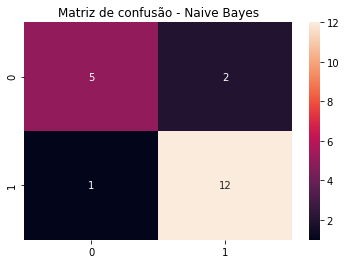

              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.86      0.92      0.89        13

    accuracy                           0.85        20
   macro avg       0.85      0.82      0.83        20
weighted avg       0.85      0.85      0.85        20



In [257]:
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

y_pred_nb = model_nb.predict(X_test)

cm_nb = metrics.confusion_matrix(y_test, y_pred_nb)

sns.heatmap(cm_nb, annot=True)

plt.title('Matriz de confusão - Naive Bayes')
plt.show()

print(classification_report(y_test, y_pred_nb))

O modelo _Naive Bayes_ apresentou 5 verdadeiro positivos, 2 falso negativos, 1 falso positivo e 12 verdadeiro negativos. Segundo a avaliação o modelo apresentou uma acurácia de 85%.

#### Regressão logística

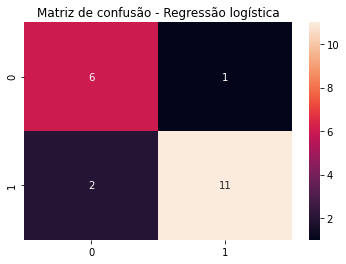

              precision    recall  f1-score   support

           0       0.75      0.86      0.80         7
           1       0.92      0.85      0.88        13

    accuracy                           0.85        20
   macro avg       0.83      0.85      0.84        20
weighted avg       0.86      0.85      0.85        20



In [258]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)

cm_lr = metrics.confusion_matrix(y_test, y_pred_lr)

sns.heatmap(cm_lr, annot=True)

plt.title('Matriz de confusão - Regressão logística')
plt.show()

print(classification_report(y_test, y_pred_lr))

O modelo de regressão logística apresentou 6 verdadeiro positivos, 1 falso negativo, 2 falso positivos e 11 verdadeiro negativos. Segundo a avaliação o modelo apresentou uma acurácia de 85%.

#### $k$-NN

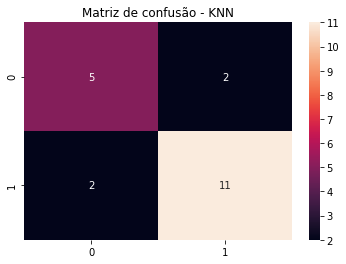

              precision    recall  f1-score   support

           0       0.71      0.71      0.71         7
           1       0.85      0.85      0.85        13

    accuracy                           0.80        20
   macro avg       0.78      0.78      0.78        20
weighted avg       0.80      0.80      0.80        20



In [259]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

y_pred_knn = model_knn.predict(X_test)

cm_knn = metrics.confusion_matrix(y_test, y_pred_knn)

sns.heatmap(cm_knn, annot=True)

plt.title('Matriz de confusão - KNN')
plt.show()

print(classification_report(y_test, y_pred_knn))

O modelo $k$-NN apresentou 5 verdadeiro positivos, 2 falso negativos, 2 falso positivos e 11 verdadeiro negativos. Segundo a avaliação o modelo apresentou uma acurácia de 80%.

#### Árvore de decisão

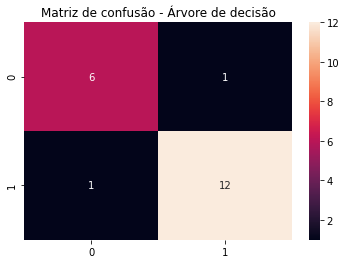

              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.92      0.92      0.92        13

    accuracy                           0.90        20
   macro avg       0.89      0.89      0.89        20
weighted avg       0.90      0.90      0.90        20



In [260]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

y_pred_dt = model_dt.predict(X_test)

cm_dt = metrics.confusion_matrix(y_test, y_pred_dt)

sns.heatmap(cm_dt, annot=True)

plt.title('Matriz de confusão - Árvore de decisão')
plt.show()

print(classification_report(y_test, y_pred_dt))

O modelo de árvore de decisão apresentou 6 verdadeiro positivos, 1 falso negativo, 1 falso positivo e 12 verdadeiro negativos. Segundo a avaliação o modelo apresentou uma acurácia de 90%.

### Avaliação dos modelos

De acordo com os dados apresentados na seção anterior o modelo de árvore de decisão apresenta uma maior acurácia de 90% comparado aos outros modelos, possuindo menos ocorrências de falso positivos e falso negativos.

### Mapeamento de características e esboço da fronteira de decisão

Afim de tornar os dados do treinamento do modelo mais apropriados para a classificação a classe _PolynomialFeatures_ da biblioteca _Scikit Learn_ é utilizada para adicionar mais características ao conjunto de dados a partir das já existentes. Será utilizado um polinômio de grau 6 para o mapeamento das características, que deve produzir um vetor de 28 dimensões. Após o mapeamento das características será treinado novamente um modelo de regressão polinomial para a classificação. Em seguida é apresentado o gráfico com o esboço da fronteira de decisão do resultado do modelo. Conforme pode ser observado no gráfico abaixo, o resultado produzido apresenta uma fronteira de decisão que se ajusta bem aos dados separando os aprovados dos não aprovados.

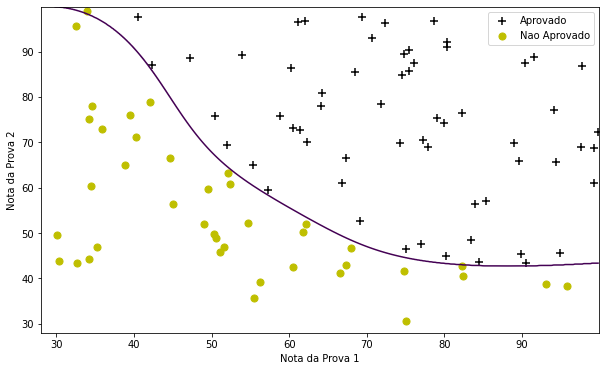

In [314]:
poly = PolynomialFeatures(6)
X_train_poly = poly.fit_transform(X_train)

model_lr_poly = LogisticRegression()
model_lr_poly.fit(X_train_poly, y_train)

xx, yy = np.mgrid[28:100:.1, 28:100:.1]

grid = np.c_[xx.ravel(), yy.ravel()]
grid_poly = poly.fit_transform(grid)

probs = model_lr_poly.predict_proba(grid_poly)[:, 1].reshape(xx.shape)

pos = X[y == 1]
neg = X[y == 0]

fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(pos[:, :-1], pos[:, -1:], s=50, c='k', marker='+', label='Aprovado')
ax.scatter(neg[:, :-1], neg[:, -1:], s=50, c='y', marker='o', label='Nao Aprovado')
ax.contour(xx, yy, probs, levels=[0.5])
ax.legend()
ax.set_xlabel('Nota da Prova 1')
ax.set_ylabel('Nota da Prova 2')

plt.show()

## Regularização

In [315]:
data = spio.loadmat('../T1/data/ex5data1.mat', squeeze_me=True)

X, y = data['X'].reshape(-1, 1), data['y']

X_test, y_test = data['Xtest'].reshape(-1, 1), data['ytest']
X_val, y_val = data['Xval'].reshape(-1, 1), data['yval']

X_train_val = np.concatenate((X, X_val))
y_train_val = np.concatenate((y, y_val))

### Visualização dos dados

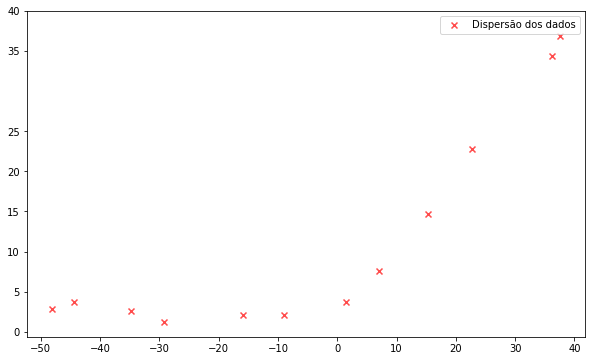

In [316]:
plt.figure(figsize=(10,6))

plt.scatter(X, y, color='r', alpha=0.7, marker='x')
plt.legend(['Dispersão dos dados'])

plt.yticks([0,5,10,15,20,25,35,40])
plt.xticks([-50,-40,-30,-20,-10,0,10,20,30,40,])

plt.show()

### Ajuste de um regressor linear

Nesta seção será utilizada a classe _LinearRegression_ da biblioteca _Scikit Learn_ para ajustar um regressor linear para prever a quantidade de água fluindo de uma barragem usando a mudança no nível de água em um reservatório.

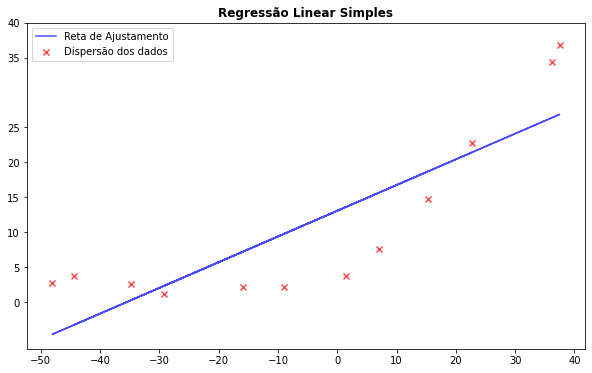

In [317]:
model = LinearRegression()
model.fit(X, y)

plt.figure(figsize=(10,6))

plt.scatter(X, y, color='r', alpha=0.7, marker='x')
plt.plot(X, model.predict(X), color='b', alpha=0.7)
plt.legend(['Reta de Ajustamento', 'Dispersão dos dados'])
plt.title('Regressão Linear Simples', fontweight='bold')

plt.yticks([0,5,10,15,20,25,35,40])
plt.xticks([-50,-40,-30,-20,-10,0,10,20,30,40,])

plt.show()

### Curvas de aprendizado

Com base no modelo de regressão linear ajustado na seção anterior, nesta seção será avaliado a curva de aprendizado para verificar o ajuste do modelo. Para isto, será utilizada a função _learning\_curve_ do biblioteca _Scikit Learn_, como entrada para esta função os dados de treinamento e validação são concatenados nas variáveis _X\_train\_val_ e _y\_train\_val_, e o tamanho do conjunto de treinamento é indicado pela variável _train\_sizes_ que é utilizado pela função para gerar os _scores_ para a curva de aprendizado. Conforme pode ser observado no gráfico abaixo, os _scores_ de treinamento e validação aprensentam valores altos indicando um viés alto do modelo, ou seja, o modelo resultou em subajuste e pode se beneficiar da adição de mais características.

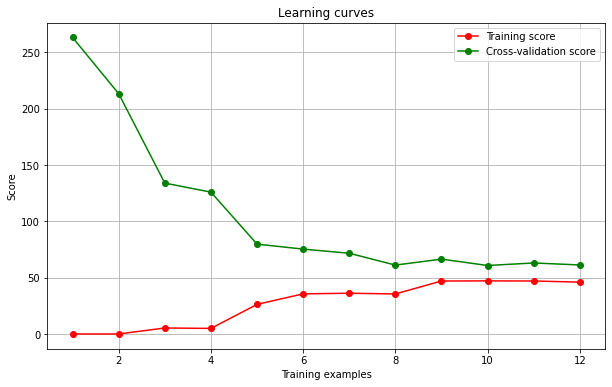

In [318]:
train_sizes = list(range(1,13))

train_sizes, train_scores, test_scores, = \
    learning_curve(model, X_train_val, y_train_val, scoring='neg_mean_squared_error', train_sizes=train_sizes)

train_scores_mean = np.mean(-train_scores, axis=1)
test_scores_mean = np.mean(-test_scores, axis=1)

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Learning curves")
ax.set_xlabel("Training examples")
ax.set_ylabel("Score")
ax.grid()
ax.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
ax.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
ax.legend()
plt.show()

### Ajuste de um regressor linear não-regularizado

Dados os resultados da curva de aprendizado encontrados na seção anterior, nesta seção serão adicionadas mais características ao conjunto de dados para verificar se o modelo se ajusta melhor. Será utilizada a classe _PolynomialFeatures_ da biblioteca _Scikit Learn_ para adicionar mais características ao conjunto de dados a partir das já existentes. Será utilizado um polinômio de grau 8 para o mapeamento das características, que deve produzir um vetor de 9 dimensões. Após a adição de mais características os dados devem ser normalizados utilizando a classe _StandardScaler_ da biblioteca _Scikit Learn_. Após este preprocessamento dos dados é ajustado novamente um modelo de regressão linar. Conforme pode ser observado no primeiro gráfico abaixo este modelo se ajusta melhor aos dados. Após o ajuste do modelo é gerada a curva de treinamento para verificar o ajuste do modelo. Conforme pode ser observado no segundo gráfico abaixo, o _score_ de treinamento é baixo e o _score_ de validação é alto, isto indica que o modelo sofre de _overfitting_, ou seja, o modelo se ajusta muito aos dados de treinamento e não generaliza bem.

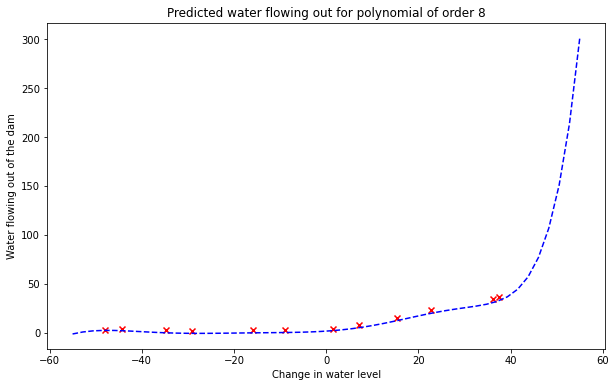

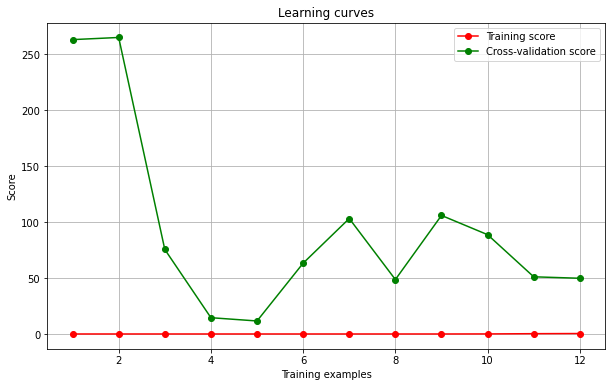

In [319]:
poly = PolynomialFeatures(8)

X_poly = poly.fit_transform(X)

X_val_poly = poly.fit_transform(X_val)

ss = StandardScaler()

X_poly_norm = ss.fit_transform(X_poly)

X_val_poly_norm = ss.fit_transform(X_val_poly)

X_train_val_poly_norm = np.concatenate((X_poly_norm, X_val_poly_norm))

model = LinearRegression()
model.fit(X_poly_norm, y)

xvalue = np.linspace(-55, 55, 50).reshape((-1, 1))
xpoly = poly.fit_transform(xvalue)

mean = ss.mean_
std = ss.scale_

xpolynorm = (xpoly - mean) / std

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='red', marker='x')
plt.xlabel('Change in water level')
plt.ylabel('Water flowing out of the dam')
plt.plot(xvalue, model.predict(xpolynorm), "b--")
plt.title("Predicted water flowing out for polynomial of order 8")
plt.show()

train_sizes = list(range(1,13))

train_sizes, train_scores, test_scores, = \
    learning_curve(model, X_train_val_poly_norm, y_train_val, scoring='neg_mean_squared_error', train_sizes=train_sizes)

train_scores_mean = np.mean(-train_scores, axis=1)
test_scores_mean = np.mean(-test_scores, axis=1)

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Learning curves")
ax.set_xlabel("Training examples")
ax.set_ylabel("Score")
ax.grid()
ax.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
ax.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
ax.legend()
plt.show()

### Ajuste de um regressor polinomial regularizado

Afim de resolver o problema do _overfitting_ da seção anterior, nesta seção será utilizada uma técnica de regularização. Para isto, serão utilizadas as classes _Ridge_ e _Lasso_ da biblioteca _Scikit Learn_ para ajustar um modelo de regressão com regularização. A regularização possui o parâmetro _alpha_ para determinar o nível de regularização aplicada. Para sintonizar o hiperparâmetro _alpha_ será utilizada a classe _GridSearchCV_ da biblioteca _Scikit Learn_, esta classe vai avaliar todos os valores dos parâmetros de entrada e determinar o melhor valor. Para a classe Ridge os parâmetros de _alpha_ de entrada é uma lista de 0 a 5 com incrementos de 0.05. A seguir serão apresentados os resultados do modelo Ridge.

{'alpha': 0.05}


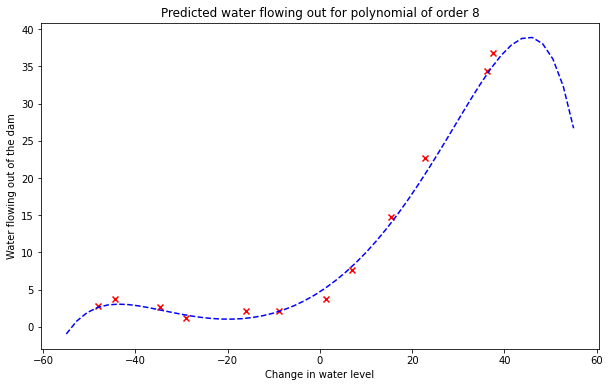

In [322]:
model_ridge = Ridge()

params = {'alpha': np.linspace(0, 5, 101)}

grid_ridge = GridSearchCV(model_ridge, params, scoring='neg_mean_squared_error')
grid_ridge.fit(X_poly_norm, y)

print(grid_ridge.best_params_)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='red', marker='x')
plt.xlabel('Change in water level')
plt.ylabel('Water flowing out of the dam')
plt.plot(xvalue, grid_ridge.best_estimator_.predict(xpolynorm), "b--")
plt.title("Predicted water flowing out for polynomial of order 8")
plt.show()

Para o modelo _Lasso_ a entrada de _alpha_ para a classe _GridSearchCV_ é uma lista de 0.05 a 5 com incrementos de 0.05. O parâmetro _tol_ passado como entrada para a classe _Lasso_ define o fator de tolerância para otimização do modelo pois o valor padrão é muito baixo e apresentava um erro ao plotar a curva de aprendizado na seção seguinte, por isso foi definido um valor um pouco maior. Abaixo são apresentados os resultados do modelo _Lasso_.

{'alpha': 0.05}


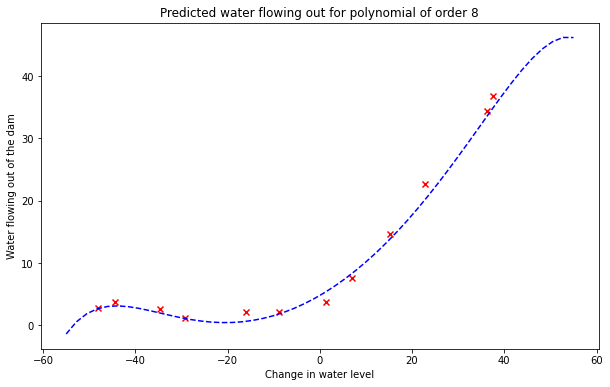

In [325]:
model_lasso = Lasso(tol=0.0003)

params = {'alpha': np.linspace(0, 5, 101)[1:]}

grid_lasso = GridSearchCV(model_lasso, params, scoring='neg_mean_squared_error')
grid_lasso.fit(X_poly_norm, y)

print(grid_lasso.best_params_)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='red', marker='x')
plt.xlabel('Change in water level')
plt.ylabel('Water flowing out of the dam')
plt.plot(xvalue, grid_lasso.best_estimator_.predict(xpolynorm), "b--")
plt.title("Predicted water flowing out for polynomial of order 8")
plt.show()

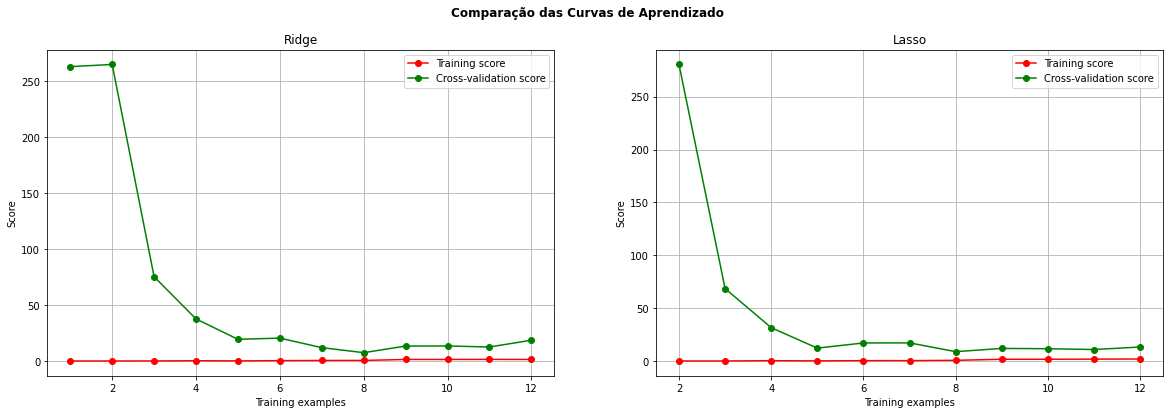

In [326]:
fig = plt.figure(figsize=(20,6))
fig.suptitle('Comparação das Curvas de Aprendizado', fontweight='bold')

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# Ridge
train_sizes = list(range(1,13))

train_sizes, train_scores, test_scores, = \
    learning_curve(grid_ridge.best_estimator_, X_train_val_poly_norm, y_train_val, scoring='neg_mean_squared_error', train_sizes=train_sizes)

train_scores_mean = np.mean(-train_scores, axis=1)
test_scores_mean = np.mean(-test_scores, axis=1)

ax1.set_title("Ridge")
ax1.set_xlabel("Training examples")
ax1.set_ylabel("Score")
ax1.grid()
ax1.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
ax1.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
ax1.legend()

# Lasso
train_sizes = list(range(2,13))

train_sizes, train_scores, test_scores, = \
    learning_curve(grid_lasso.best_estimator_, X_train_val_poly_norm, y_train_val, scoring='neg_mean_squared_error', train_sizes=train_sizes)

train_scores_mean = np.mean(-train_scores, axis=1)
test_scores_mean = np.mean(-test_scores, axis=1)

ax2.set_title("Lasso")
ax2.set_xlabel("Training examples")
ax2.set_ylabel("Score")
ax2.grid()
ax2.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
ax2.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
ax2.legend()

plt.show()

Acima são apresentadas as curvas de aprendizado dos modelos _Ridge_ e _Lasso_. Conforme pode ser observado, o valor do _score_ da validação cruzada se aproxima de zero, indicando que o problema do _overfitting_ foi resolvido.